<a href="https://colab.research.google.com/github/divakar9819/Deep_Learning_implementation/blob/master/FeedForwardNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error , log_loss
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder

In [0]:
class SigmoidNeuron:
    
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
          
      m = X.shape[1]  
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [0]:
sigmoid = SigmoidNeuron()#SigmoidNN()

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

# Generate Data Set 

In [2]:
data , labels = make_blobs(n_samples=1000,centers=4,n_features=2,random_state = 0)
print(data.shape,labels.shape)

(1000, 2) (1000,)


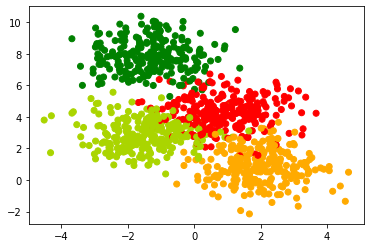

In [0]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap = my_cmap)
plt.show()

In [0]:
labels_orig = labels
labels = np.mod(labels,2)

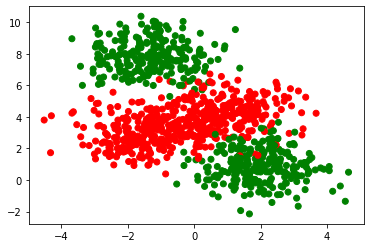

In [0]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
x_train , x_val , y_train , y_val = train_test_split(data,labels,stratify=labels,random_state=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


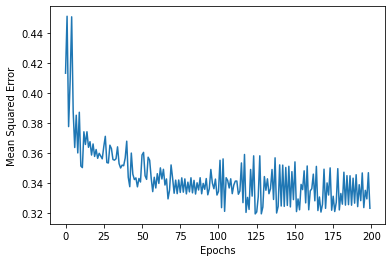

In [0]:
sigmoid.fit(x_train , y_train,epochs=200,learning_rate=0.5,loss_fn='mse',display_loss=True)

In [0]:
#sigmoid.fit(x_train , y_train,epochs=200,lr=0.5,loss_fn='ce')

In [0]:
#log_loss([3,1],[2,3])

In [0]:
y_pred_train = sigmoid.predict(x_train)
y_pred_binarised_train = (y_pred_train >= 0.5).astype('int').ravel()
y_pred_val = sigmoid.predict(x_val)
y_pred_binarised_val = (y_pred_val >=0.5)

In [0]:
train_accuracy = accuracy_score(y_pred_binarised_train,y_train)
val_accuracy = accuracy_score(y_pred_binarised_val,y_val)

In [0]:
print("Train accuracy ",train_accuracy)
print("Validiation accuracy ",val_accuracy)

Train accuracy  0.668
Validiation accuracy  0.684


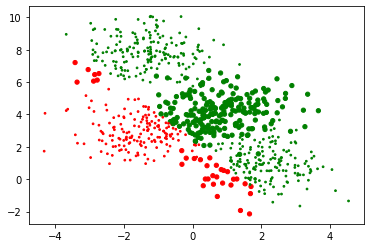

In [0]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_pred_binarised_train,cmap=my_cmap,s=15*(np.abs(y_pred_binarised_train-y_train)+.2))
plt.show()

# Our first FFNN

In [0]:
class FFNN:
    def __init__(self):
        self.w1 = np.random.randn()
        self.w2 = np.random.randn()
        self.w3 = np.random.randn()
        self.w4 = np.random.randn()
        self.w5 = np.random.randn()
        self.w6 = np.random.randn()
        self.b1 = 0
        self.b2 = 0
        self.b3 = 0
        
    def sigmoid(self,x):
        return 1.0 / (1.0 + np.exp(-x))
        
    def forward_pass(self,x):
        self.x1 , self.x2 = x
        self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
        self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
        
        self.h1 = self.sigmoid(self.a1)
        self.h2 = self.sigmoid(self.a2)
        
        self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
        self.h3 = self.sigmoid(self.a3)
        return self.h3
        
    def grad(self,x,y):
        self.forward_pass(x)
        
        
        self.dw5 = (self.h3-y)*self.h3*(1-self.h3)*self.h1
        self.dw6 = (self.h3-y)*self.h3*(1-self.h3)*self.h2
        self.db3 = (self.h3-y)*self.h3*(1-self.h3)
        
        self.dw1 = (self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)*self.x1
        self.dw2 = (self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)*self.x2
        self.db1 = (self.h3-y)*self.h3*(1-self.h3)*self.w5*self.h1*(1-self.h1)
        
        self.dw3 = (self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)*self.x1
        self.dw4 = (self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)*self.x2
        self.db2 = (self.h3-y)*self.h3*(1-self.h3)*self.w6*self.h2*(1-self.h2)
        
    def fit(self,x,y,epochs=1,lr=1,initialise=True,display_loss=True):
        if initialise:
            self.w1 = np.random.random()
            self.w2 = np.random.random()
            self.w3 = np.random.random()
            self.w4 = np.random.random()
            self.w5 = np.random.random()
            self.w6 = np.random.random()
            self.b1 = 0
            self.b2 = 0
            self.b3 = 0
            
        if display_loss:
            loss={}
            
        for i in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
            dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
            for X , Y in zip(x,y):
                self.grad(X,Y)
                dw1 += self.dw1
                dw2 += self.dw2
                dw3 += self.dw3
                dw4 += self.dw4
                dw5 += self.dw5
                dw6 += self.dw6
                db1 += self.db1
                db2 += self.db2
                db3 += self.db3
                
            m = x.shape[1]
            self.w1 -= lr*dw1/m
            self.w2 -= lr*dw2/m
            self.w3 -= lr*dw3/m
            self.w4 -= lr*dw4/m
            self.w5 -= lr*dw5/m
            self.w6 -= lr*dw6/m
            self.b1 -= lr*db1/m
            self.b2 -= lr*db2/m
            self.b3 -= lr*db3/m
            
            if display_loss:
                Y_pred = self.predict(x)
                loss[i] = mean_squared_error(Y_pred,y)
                
        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.show()
            
    def predict(self,x):
        Y_pred = []
        for X in x:
            result = self.forward_pass(X)
            Y_pred.append(result)
        return np.array(Y_pred)
    

In [0]:
ffnn = FFNN()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


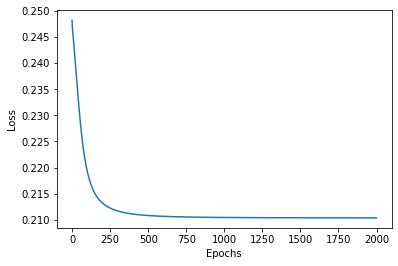

In [0]:
ffnn.fit(x_train , y_train , epochs=2000,lr=0.01)

In [0]:
Y_pred_train = ffnn.predict(x_train)
Y_pred_val = ffnn.predict(x_val)
Y_pred_binarised_train = Y_pred_train >=0.5
Y_pred_binarised_val = Y_pred_val >=0.5
train_accuracy = accuracy_score(Y_pred_binarised_train,y_train)
val_accuracy = accuracy_score(Y_pred_binarised_val,y_val)
print("Train accuracy ",train_accuracy)
print("Validation accuracy ",val_accuracy)

Train accuracy  0.6626666666666666
Validation accuracy  0.688


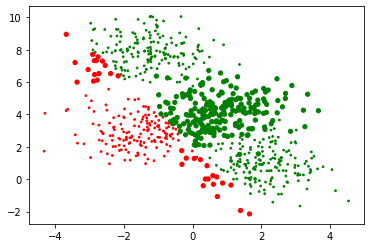

In [0]:
plt.scatter(x_train[:,0],x_train[:,1],cmap=my_cmap,c=Y_pred_binarised_train,s=15*(np.abs(Y_pred_binarised_train-y_train)+.2))
plt.show()

# Generic Feedforward Network

In [0]:
class FeedforwardNN:
    def __init__(self,n_input,hidden_sizes=[2]):
        self.nx = n_input
        self.nh = len(hidden_sizes)
        self.ny = 1
        self.sizes = [self.nx] + hidden_sizes + [self.ny]
        self.W = {}
        self.B = {}
        for i in range(self.nh+1):
            self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1])
            self.B[i] = np.zeros((1,self.sizes[i+1]))
        
    def sigmoid(self,x):
        return 1.0/(1.0 + np.exp(-x))
    
    def forward_pass(self, x):
      self.A = {}
    
      self.H = {}
      self.H[0] = x.reshape(1, -1)
      for i in range(self.nh+1):
        self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
        self.H[i+1] = self.sigmoid(self.A[i+1])
      return self.H[self.nh+1]
        
    def grad_sigmoid(self,x):
        return x*(1-x)
    
    def grad(self, x, y):
      self.forward_pass(x)
      self.dW = {}
      self.dB = {}
      self.dH = {}
      self.dA = {}
      L = self.nh + 1
      self.dA[L] = (self.H[L] - y)
      for k in range(L, 0, -1):
        self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
        self.dB[k] = self.dA[k]
        self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
        self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
            
    def fit(self,x,y,epochs=1,lr=1,initialise=True,display_loss=False):
        if initialise:
            for i in range(self.nh+1):
                self.W[i+1] = np.random.randn(self.sizes[i] ,self.sizes[i+1])
                self.B[i+1] = np.zeros((1,self.sizes[i+1]))
                
        if display_loss:
            loss = {}
            
        for e in tqdm_notebook(range(epochs),total=epochs,unit='epoch'):
            
            dW = {}
            dB = {}
            for i in range(self.nh+1):
                dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
                dB[i+1] = np.zeros((1, self.sizes[i+1]))
            for X , Y in zip(x,y):
                self.grad(X,Y)
                for i in range(self.nh+1):
                    dW[i+1] += self.dW[i+1]
                    dB[i+1] += self.dB[i+1]
                        
            m = x.shape[1]
            for i in range(self.nh+1):
                self.W[i+1] -= lr*dW[i+1]/m
                self.B[i+1] -= lr*dB[i+1]/m
                    
            if display_loss:
                Y_pred = self.predict(x)
                loss[e] = mean_squared_error(Y_pred,y)
                    
        if display_loss:
            plt.plot(np.array(list(loss.values())).astype(float))
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
                
    def predict(self,x):
        Y_pred = []
        for X in x:
            result = self.forward_pass(X)
            Y_pred.append(result)
        return np.array(Y_pred).squeeze()
            
          

In [0]:
ffnn = FeedforwardNN(2,[2,3])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


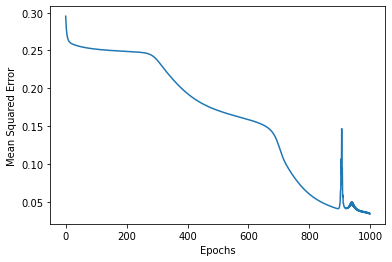

In [0]:
ffnn.fit(x_train,y_train,epochs=1000,lr=0.001,display_loss=True)

In [0]:
Y_pred_train = ffnn.predict(x_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffnn.predict(x_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.96
Validation accuracy 0.97


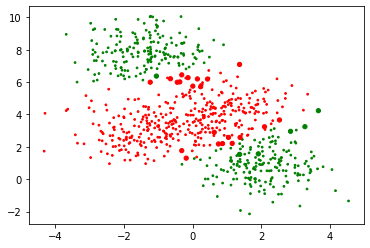

In [0]:
plt.scatter(x_train[:,0], x_train[:,1], c=Y_pred_binarised_train, cmap=my_cmap, s=15*(np.abs(Y_pred_binarised_train-y_train)+.2))
plt.show()

Feed forward Neural Network with multiclass

In [0]:
class FFNNMulticlass:
  
  def __init__(self, n_inputs,n_output, hidden_sizes=[2]):
    self.nx = n_inputs
    self.ny = n_output
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]
    
    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def softmax(self,x):
    exps = np.exp(x)
    return exps/(np.sum(exps))
  
  def forward_pass(self, x):
    self.A = {}
    
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    self.A[self.nh+1] = np.matmul(self.H[self.nh],self.W[self.nh+1]) + self.B[self.nh+1]
    self.H[self.nh+1] = self.softmax(self.A[self.nh+1])
    return self.H[self.nh+1]
  
  def grad_sigmoid(self, x):
    return x*(1-x)

  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl 
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    if display_loss:
      loss = {}
    
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
        
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = self.cross_entropy(Y_pred, Y)
    
    if display_loss:
      plt.plot(np.array(list(loss.values())).astype(float))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

In [0]:
ffnnm = FFNNMulticlass(2,4,[2,3])

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig, stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, labels_orig.shape)

(750, 2) (250, 2) (1000,)


In [0]:
enc = OneHotEncoder()
# 0 -> (1, 0, 0, 0), 1 -> (0, 1, 0, 0), 2 -> (0, 0, 1, 0), 3 -> (0, 0, 0, 1)
y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
y_OH_val = enc.fit_transform(np.expand_dims(Y_val,1)).toarray()
print(y_OH_train.shape, y_OH_val.shape)

(750, 4) (250, 4)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


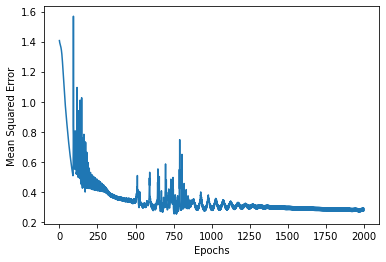

In [0]:
ffnnm = FFNNMulticlass(2,4,[2,3])
ffnnm.fit(X_train,y_OH_train,epochs=2000,learning_rate=.005,display_loss=True)

In [0]:
Y_pred_train = ffnnm.predict(X_train)
Y_pred_train = np.argmax(Y_pred_train,1)

Y_pred_val = ffnnm.predict(X_val)
Y_pred_val = np.argmax(Y_pred_val,1)

accuracy_train = accuracy_score(Y_pred_train, Y_train)
accuracy_val = accuracy_score(Y_pred_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.89
Validation accuracy 0.9


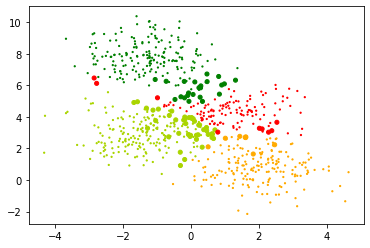

In [0]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()